In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sys

import torch
from torch import nn
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

from tqdm import tqdm

In [2]:
!cp "/content/drive/MyDrive/KLEEMANN/2_year_samples.xlsx" "/content"

In [3]:
class KleemannDataset(Dataset):
    def __init__(self, pressure_ts, seq_length=15, mean=0, std=1.0):
        self.data = torch.tensor(pressure_ts, dtype=torch.float)        
        self.data = (self.data - mean) / std
        self.seq_length = seq_length
        
    def __len__(self):
        return len(self.data) - self.seq_length - 1
    
    def __getitem__(self, i):
        return self.data[i:(i + self.seq_length)], self.data[i + self.seq_length]

In [4]:
class RegressionLSTM(nn.Module):
    def __init__(self, device, seq_length, hidden_units):
        super().__init__()
        self.seq_length = seq_length
        self.hidden_units = hidden_units
        self.num_layers = 1
        self.lstm = nn.LSTM(
            input_size=1,
            hidden_size=hidden_units,
            batch_first=True,
            num_layers=self.num_layers
        )
        self.linear = nn.Linear(in_features=self.hidden_units, out_features=1)
        self.device = device

    def forward(self, x):
        x = x.unsqueeze(2)
        batch_size = x.shape[0]
        h0 = torch.zeros(self.num_layers, batch_size, self.hidden_units, device=self.device).requires_grad_()
        c0 = torch.zeros(self.num_layers, batch_size, self.hidden_units, device=self.device).requires_grad_()
        _, (hn, _) = self.lstm(x, (h0, c0))
        out = self.linear(hn[0]).flatten()  # First dim of Hn is num_layers, which is set to 1 above.
        
        return out

In [5]:
# Define xlsx filename
filename = "/content/2_year_samples.xlsx"
# Read the .xlsx
df = pd.read_excel(filename)
# Drop columns that we don't need
df_cleaned = df.drop(df.columns[[0, 7]],axis = 1)
# Set Dataframe's dtype to float32
df_cleaned = df_cleaned.astype(np.float32)
print(df_cleaned.shape)
df_cleaned.head()

(109970, 6)


,SPEED UP,NOISE UP,PRESSURE UP,SPEED DOWN,NOISE DOWN,PRESSURE DOWN
0,0.0,51.049999,15.66,0.00,56.360001,17.17
1,0.0,51.049999,15.66,0.00,56.099998,16.68
2,0.0,51.189999,15.66,0.00,55.939999,16.68
3,0.0,52.139999,15.66,0.00,55.939999,15.29
4,0.0,52.139999,15.66,0.07,55.869999,15.29


In [8]:
feature_types = ['SPEED UP', 'NOISE UP', 'PRESSURE UP', 'SPEED DOWN', 'NOISE DOWN', 'PRESSURE DOWN']
# seq_lengths = [x for x in range(1,21)]
seq_lengths = [15]


Training for SPEED UP with sequence length = 15



 10%|█         | 1/10 [00:05<00:45,  5.01s/it]

Train loss: 0.04303791438596689


 20%|██        | 2/10 [00:08<00:33,  4.22s/it]

Train loss: 0.008667771720636574


 30%|███       | 3/10 [00:12<00:27,  3.93s/it]

Train loss: 0.008344235059124332


 40%|████      | 4/10 [00:15<00:22,  3.81s/it]

Train loss: 0.008097716482860118


 50%|█████     | 5/10 [00:19<00:18,  3.74s/it]

Train loss: 0.008029492219543397


 60%|██████    | 6/10 [00:23<00:15,  3.79s/it]

Train loss: 0.007883538070046624


 70%|███████   | 7/10 [00:27<00:11,  3.80s/it]

Train loss: 0.00783198461849432


 80%|████████  | 8/10 [00:31<00:07,  3.97s/it]

Train loss: 0.007740328713683589


 90%|█████████ | 9/10 [00:35<00:03,  3.84s/it]

Train loss: 0.007680763151505228


100%|██████████| 10/10 [00:39<00:00,  3.90s/it]

Train loss: 0.007644806384251864



MSE loss in sample SPEED UP: 0.00016385529306717217
MSE loss out of sample SPEED UP: 0.00013631340698339045



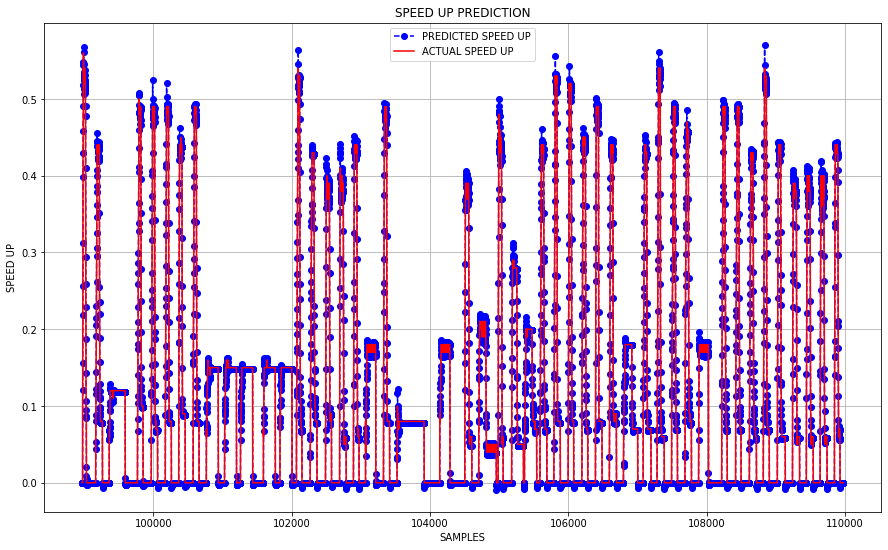


Training for NOISE UP with sequence length = 15



 10%|█         | 1/10 [00:03<00:32,  3.60s/it]

Train loss: 0.06450533369611304


 20%|██        | 2/10 [00:07<00:29,  3.70s/it]

Train loss: 0.03025115053765898


 30%|███       | 3/10 [00:11<00:25,  3.69s/it]

Train loss: 0.030067808579001872


 40%|████      | 4/10 [00:14<00:22,  3.78s/it]

Train loss: 0.03003589692458779


 50%|█████     | 5/10 [00:18<00:19,  3.83s/it]

Train loss: 0.029920221281291667


 60%|██████    | 6/10 [00:22<00:15,  3.78s/it]

Train loss: 0.029973967560136067


 70%|███████   | 7/10 [00:26<00:11,  3.74s/it]

Train loss: 0.03002237308966902


 80%|████████  | 8/10 [00:29<00:07,  3.69s/it]

Train loss: 0.029867823302862685


 90%|█████████ | 9/10 [00:33<00:03,  3.68s/it]

Train loss: 0.029870948205628748


100%|██████████| 10/10 [00:37<00:00,  3.71s/it]

Train loss: 0.029834069057042594



MSE loss in sample NOISE UP: 31.3436336517334
MSE loss out of sample NOISE UP: 33.28488540649414



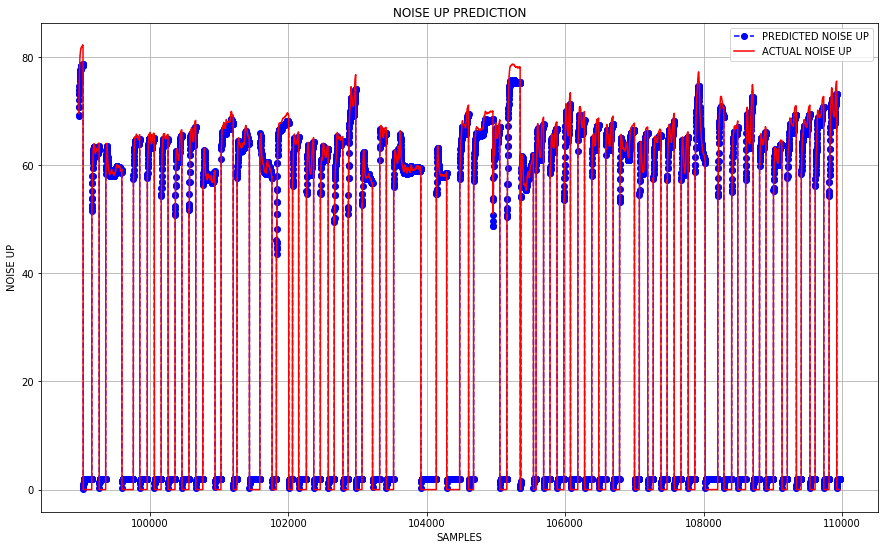


Training for PRESSURE UP with sequence length = 15



 10%|█         | 1/10 [00:03<00:32,  3.60s/it]

Train loss: 0.06363611839703463


 20%|██        | 2/10 [00:07<00:28,  3.59s/it]

Train loss: 0.029503035560763145


 30%|███       | 3/10 [00:10<00:25,  3.61s/it]

Train loss: 0.029332840208015597


 40%|████      | 4/10 [00:14<00:21,  3.62s/it]

Train loss: 0.029337126869322133


 50%|█████     | 5/10 [00:18<00:18,  3.60s/it]

Train loss: 0.029275378775530412


 60%|██████    | 6/10 [00:21<00:14,  3.59s/it]

Train loss: 0.029293475200427337


 70%|███████   | 7/10 [00:25<00:10,  3.58s/it]

Train loss: 0.029212604916446446


 80%|████████  | 8/10 [00:28<00:07,  3.61s/it]

Train loss: 0.02922633533602006


 90%|█████████ | 9/10 [00:32<00:03,  3.62s/it]

Train loss: 0.02920349531638967


100%|██████████| 10/10 [00:36<00:00,  3.61s/it]

Train loss: 0.029181085286592034



MSE loss in sample PRESSURE UP: 3.2170257568359375
MSE loss out of sample PRESSURE UP: 3.6579174995422363



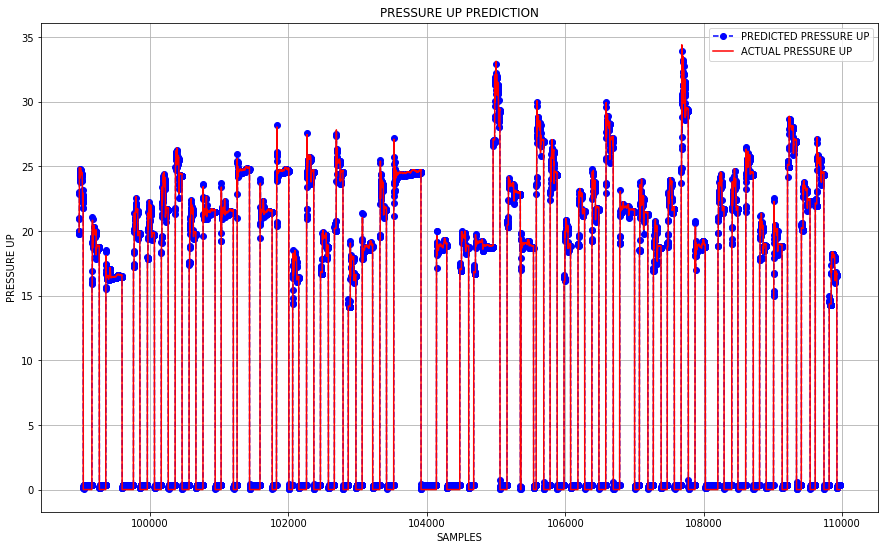


Training for SPEED DOWN with sequence length = 15



 10%|█         | 1/10 [00:03<00:32,  3.65s/it]

Train loss: 0.040647344431096695


 20%|██        | 2/10 [00:07<00:29,  3.63s/it]

Train loss: 0.008491167827083717


 30%|███       | 3/10 [00:10<00:25,  3.63s/it]

Train loss: 0.008159361346819695


 40%|████      | 4/10 [00:14<00:21,  3.65s/it]

Train loss: 0.008032577337170985


 50%|█████     | 5/10 [00:18<00:18,  3.64s/it]

Train loss: 0.007862004581169852


 60%|██████    | 6/10 [00:21<00:14,  3.65s/it]

Train loss: 0.007699262183154322


 70%|███████   | 7/10 [00:25<00:11,  3.67s/it]

Train loss: 0.007607105280349871


 80%|████████  | 8/10 [00:29<00:07,  3.64s/it]

Train loss: 0.007519814297162179


 90%|█████████ | 9/10 [00:32<00:03,  3.63s/it]

Train loss: 0.007478338634428516


100%|██████████| 10/10 [00:36<00:00,  3.64s/it]

Train loss: 0.007379952907498592



MSE loss in sample SPEED DOWN: 0.00011643066682154313
MSE loss out of sample SPEED DOWN: 0.00011142863513668999



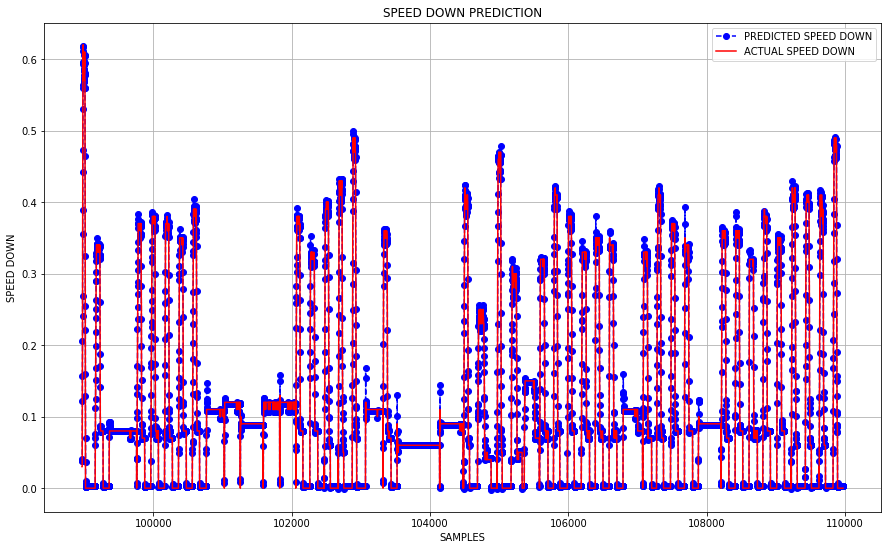


Training for NOISE DOWN with sequence length = 15



 10%|█         | 1/10 [00:03<00:32,  3.59s/it]

Train loss: 0.06419264653757303


 20%|██        | 2/10 [00:07<00:28,  3.57s/it]

Train loss: 0.028925201864397346


 30%|███       | 3/10 [00:10<00:25,  3.61s/it]

Train loss: 0.028771187182694283


 40%|████      | 4/10 [00:14<00:21,  3.61s/it]

Train loss: 0.028729124943747852


 50%|█████     | 5/10 [00:18<00:18,  3.64s/it]

Train loss: 0.02882823076384514


 60%|██████    | 6/10 [00:21<00:14,  3.64s/it]

Train loss: 0.028646055727043394


 70%|███████   | 7/10 [00:25<00:10,  3.63s/it]

Train loss: 0.02864201941674535


 80%|████████  | 8/10 [00:28<00:07,  3.61s/it]

Train loss: 0.02854609573816511


 90%|█████████ | 9/10 [00:32<00:03,  3.61s/it]

Train loss: 0.02857769335018703


100%|██████████| 10/10 [00:36<00:00,  3.62s/it]

Train loss: 0.02864692067950612



MSE loss in sample NOISE DOWN: 22.95306968688965
MSE loss out of sample NOISE DOWN: 23.2718505859375



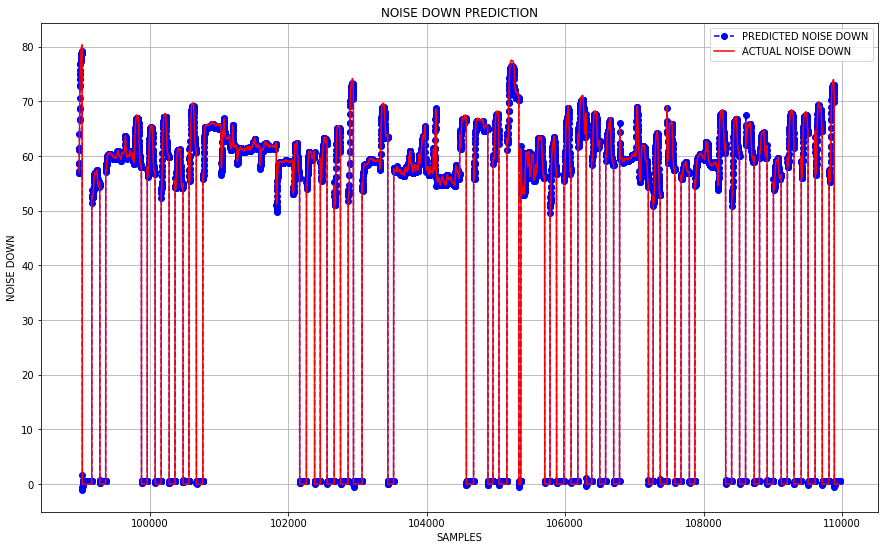


Training for PRESSURE DOWN with sequence length = 15



 10%|█         | 1/10 [00:03<00:32,  3.60s/it]

Train loss: 0.05931956870797949


 20%|██        | 2/10 [00:07<00:28,  3.59s/it]

Train loss: 0.03260630669321887


 30%|███       | 3/10 [00:10<00:25,  3.61s/it]

Train loss: 0.03239245936192739


 40%|████      | 4/10 [00:14<00:21,  3.60s/it]

Train loss: 0.03237901655021952


 50%|█████     | 5/10 [00:18<00:18,  3.60s/it]

Train loss: 0.03230893813770984


 60%|██████    | 6/10 [00:21<00:14,  3.59s/it]

Train loss: 0.03229700683457846


 70%|███████   | 7/10 [00:25<00:10,  3.58s/it]

Train loss: 0.032318021562791295


 80%|████████  | 8/10 [00:28<00:07,  3.60s/it]

Train loss: 0.03229022495008768


 90%|█████████ | 9/10 [00:32<00:03,  3.62s/it]

Train loss: 0.03222016133511089


100%|██████████| 10/10 [00:36<00:00,  3.60s/it]

Train loss: 0.03224977795422949



MSE loss in sample PRESSURE DOWN: 2.566234827041626
MSE loss out of sample PRESSURE DOWN: 2.8438782691955566



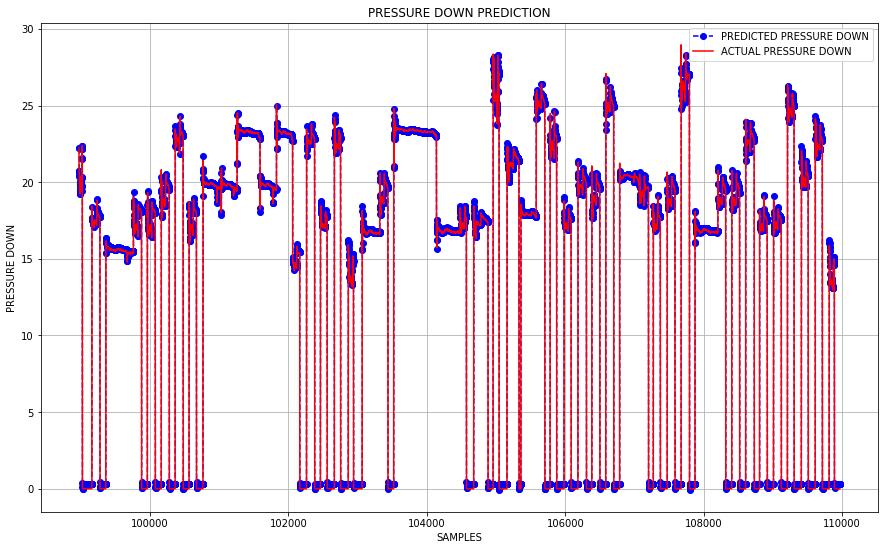

In [9]:
for feature in feature_types:
    with open(f"lstm_logs_{feature}.txt",'w',encoding = 'utf-8') as f:
        seq_losses = []
        for i, seq_len in enumerate(seq_lengths, start=1):

            # Get the feature of interest
            time_series = df_cleaned[feature]
            data = time_series.to_numpy()

            # Define the Sequence length
            seq_length = seq_len
            # Get train and test data
            train_ts = data[0:int(9 * time_series.shape[0] / 10)]            
            test_ts = data[(int(9 * time_series.shape[0] / 10) - seq_length):]

            # Get mean and std od training data
            mean = np.mean(train_ts)
            std = np.std(train_ts)

            # Get the device
            device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

            # Define the hyperparameters
            num_epochs = 10
            batch_size = 64
            ln_rate = 0.001
            num_hidden_units = 32

            # Create train and test datasets
            train_dataset = KleemannDataset(train_ts, seq_length=seq_length, mean=mean, std=std)
            test_dataset = KleemannDataset(test_ts, seq_length=seq_length, mean=mean, std=std)

            # Create dataloaders
            train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
            test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
            test_loader_in_sample = DataLoader(train_dataset, batch_size=batch_size, shuffle=False)
            
            # Initialize the model ,place it to device and set it to train mode
            lstm_model = RegressionLSTM(device=device, seq_length=seq_length, hidden_units=num_hidden_units)
            lstm_model.to(device)
            lstm_model.train()

            # Define loss function and optimizer 
            loss_function = nn.MSELoss()
            optimizer = torch.optim.Adam(lstm_model.parameters(), lr=ln_rate)

            print(f"\nTraining for {feature} with sequence length = {seq_length}\n")

            # Training Loop
            for epoch in tqdm(range(num_epochs), total=num_epochs):
                epoch_loss = 0
                for X, y in train_loader:
                    
                    # Place the training sample to device
                    X_dev = X.to(device)
                    y_dev = y.to(device)

                    # Get the prediction and calculate the loss
                    prediction = lstm_model(X_dev)
                    loss = loss_function(prediction, y_dev)
                    
                    # Backpropagation and weights update
                    optimizer.zero_grad()
                    loss.backward()
                    optimizer.step()
                    
                    # Add the loss
                    epoch_loss += loss.item()
                
                num_batches = len(train_loader)
                avg_loss = epoch_loss / num_batches
                print(f"Train loss: {avg_loss}")
            
            # Save the model
            model_path = f"lstm_{feature}_{epoch+1}.pth"
            # torch.save(lstm_model.state_dict(), model_path)

            # Calculate out of sample predictions
            outofsample_preds = torch.tensor([]).to(device)
            ground = torch.tensor([]).to(device)
            lstm_model.eval()
            with torch.inference_mode():
                for X, y in test_loader:
                    X_dev = X.to(device)
                    y_dev = y.to(device)
                    prediction = lstm_model(X_dev)
                    y_unnorm = y_dev * std + mean
                    prediction_unnorm = prediction * std + mean
                    outofsample_preds = torch.cat((outofsample_preds, prediction_unnorm), 0)
                    ground = torch.cat((ground, y_unnorm), 0)

            # Calculate insample predictions
            insample_preds = torch.tensor([]).to(device)
            inground = torch.tensor([]).to(device)
            lstm_model.eval()
            with torch.inference_mode():
                for X, y in test_loader_in_sample:
                    X_dev = X.to(device)
                    y_dev = y.to(device)
                    prediction = lstm_model(X_dev)
                    y_unnorm = y_dev * std + mean
                    prediction_unnorm = prediction * std + mean
                    insample_preds = torch.cat((insample_preds, prediction_unnorm), 0)
                    inground = torch.cat((inground, y_unnorm), 0)
            
            # Write losses in .txt file
            avg_loss_in = loss_function(inground, insample_preds).item()
            msg = f'\nMSE loss in sample {feature}: {str(avg_loss_in)}\n'
            # f.write(msg)
            print(f'\nMSE loss in sample {feature}: {avg_loss_in}')

            avg_loss_out = loss_function(ground, outofsample_preds).item()
            msg = f'MSE loss out of sample {feature}: {str(avg_loss_out)}\n'
            # f.write(msg)
            print(f'MSE loss out of sample {feature}: {avg_loss_out}\n')
            f.write(f"{i}: {avg_loss_out}\n")

            seq_losses.append(avg_loss_out)

            # Plot insample and out of sample predictions
            # plt.figure(figsize=(15, 9))
            # plt.grid(True)
            # plt.plot(inground.cpu(), 'r')
            # plt.plot(insample_preds.cpu(), 'b', marker='o', linestyle='dashed')
            # plt.title(f"LSTM in-sample predictions for {feature}")
            # plt.legend(['training data', 'predictions'])
            # fname= f'lstm_{feature}_insample.png'
            # plt.savefig(fname)
            # plt.show()

            to_row = int(len(df_cleaned)*0.9)
            sample_range = df_cleaned[to_row:].index
            sample_range = torch.tensor(sample_range[:-1]).cpu()

            plt.figure(figsize=(15, 9))
            plt.grid(True)
            plt.plot(sample_range, outofsample_preds.cpu(), 'b', marker='o', linestyle='dashed')
            plt.plot(sample_range, ground.cpu(), 'r')
            plt.title(f"{feature} PREDICTION")
            plt.xlabel("SAMPLES")
            plt.ylabel(feature)
            plt.legend([f'PREDICTED {feature}', f'ACTUAL {feature}'])
            fname= f'lstm_{feature}_predictions.png'
            plt.savefig(fname)
            plt.show()

    # plt.figure(figsize=(15, 9))
    # plt.grid(True)
    # plt.plot(range(1,21), seq_losses)
    # plt.title(f"LSTM out-of-sample loss - sequence length for {feature}")
    # plt.xlabel("Sequence Length")
    # plt.ylabel("Mean Squared Error")
    # plt.legend(['losses'])
    # fname = f'lstm_{feature}_losses_seq_lengths.png'
    # plt.savefig(fname)
    # plt.show()
